In [4]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-10-24 04:35:33,007: Credentials are already in use. The existing account in the session will be replaced.


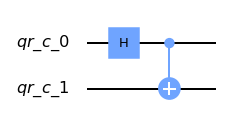

In [10]:
qr = QuantumRegister(2, name='qr_c')
comp_qc =QuantumCircuit(qr, name='My-composite')
#Add any gates to the composite gate
comp_qc.h(0)
comp_qc.cx(0,1)
#Create Composite instructions by converting QC to list of instructions
composite_inst = comp_qc.to_instruction()
comp_qc.draw()

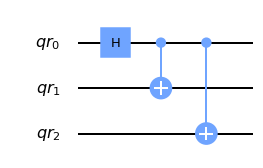

In [11]:
#Create 2-qubit circuit to generate composite gate
qr2 = QuantumRegister(3, 'qr')
qc = QuantumCircuit(qr2)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.draw()

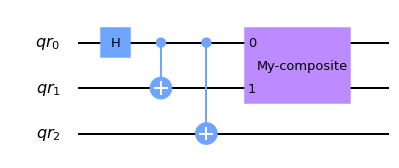

In [12]:
#Append composite gate to the specified qubits
qc.append(composite_inst, [qr2[0], qr2[1]])
qc.draw()

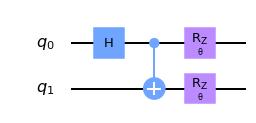

In [13]:
#To Paramterizing gates
from qiskit.circuit import Parameter
param_theta = Parameter('θ')
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.rz(param_theta,0)
qc.rz(param_theta,1)
qc.draw()

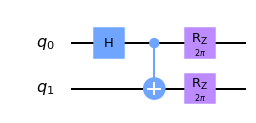

In [14]:
import numpy as np
#Bind the parameters with a value, in this case 2pi
qc = qc.bind_parameters({param_theta: 2*np.pi})
qc.draw()